In [ ]:
 #Upload the dataset into google drive

# Dog breed classification based on images 🐶

Dog breed image classifier using TensorFlow 2.0 & TensorFlow Hub.

## 1. Problem
Identify the breed of a dog using an image.
## 2. Data
The dataset has been dowloaded from Kaggle.
## 3. Evaluation
The evaluation set consists of probabilities of each dog breed based on the test image.
## 4. Features of the data
The dataset consists of unstructured images.

Hence, deep/transfer learning is the best.

## Workspace
* Import TensorFlow, TensorFlow Hub
* Use a GPU

In [3]:
#Importing TensorFlow into Colab
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.14.0


In [6]:
#Importing necessary tools
import tensorflow_hub as hub
print("TensorFlow Hub version:", hub.__version__)

#Check for GPU availability
print("GPU", " is available!!!" if tf.config.list_physical_devices("GPU")else "not available")


TensorFlow Hub version: 0.15.0
GPU  is available!!!


In [ ]:
#Access data in the drive and turning it into Tensors,i.e., numerical representation of the dataset
#Check the labels of our dataset
import pandas as pd
labels_csv = pd.read_csv("drive/My Drive/Dog-vision/labels.csv")
print(labels_csv.describe())
print(labels_csv.head())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     76491d51112372938c485fc961a31dd9  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


In [ ]:
labels_csv.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

In [ ]:
labels_csv.tail()

id                     breed
10217  ffd25009d635cfd16e793503ac5edef0                    borzoi
10218  ffd3f636f7f379c51ba3648a9ff8254f            dandie_dinmont
10219  ffe2ca6c940cddfee68fa3cc6c63213f                  airedale
10220  ffe5f6d8e2bff356e9482a80a6e29aac        miniature_pinscher
10221  fff43b07992508bc822f33d8ffd902ae  chesapeake_bay_retriever

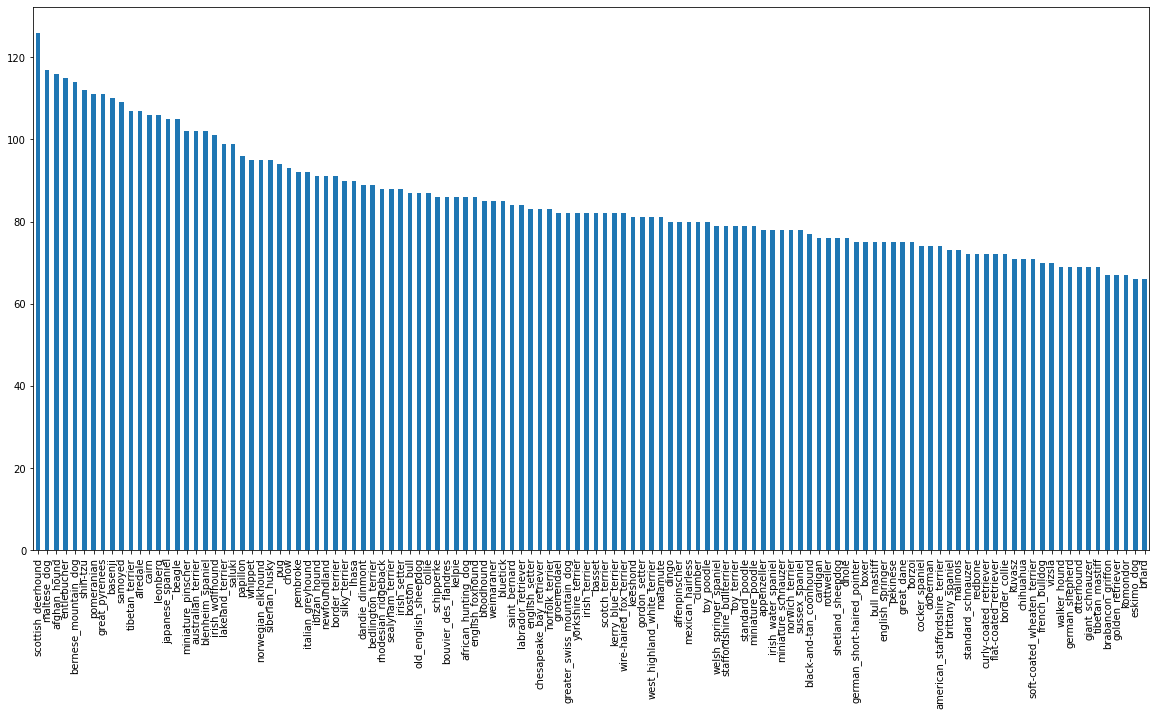

In [ ]:
# Number of images for each breed from the dataset
labels_csv["breed"].value_counts().plot.bar(figsize=(20,10))

In [ ]:
labels_csv["breed"].value_counts().median()

82.0

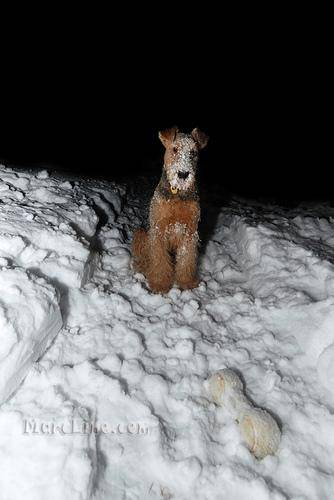

In [ ]:
# Now view an image
from IPython.display import Image
Image("/content/drive/My Drive/Dog-vision/train/ffe2ca6c940cddfee68fa3cc6c63213f.jpg")

#Generating images and their labels
Let's first generate a list of all our images using the file pathnames

In [ ]:
# Create pathnames from image ID's
filenames = ["/content/drive/My Drive/Dog-vision/train/" + fname + ".jpg" for fname in labels_csv["id"]]
filenames

['/content/drive/My Drive/Dog-vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 '/content/drive/My Drive/Dog-vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '/content/drive/My Drive/Dog-vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 '/content/drive/My Drive/Dog-vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '/content/drive/My Drive/Dog-vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 '/content/drive/My Drive/Dog-vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 '/content/drive/My Drive/Dog-vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 '/content/drive/My Drive/Dog-vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 '/content/drive/My Drive/Dog-vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 '/content/drive/My Drive/Dog-vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg',
 '/content/drive/My Drive/Dog-vision/train/004396df1acd0f1247b740ca2b14616e.jpg',
 '/content/drive/My Drive/Dog-vision/train/0067dc3eab0b3c3ef0439477624d85d6.jpg',
 '/content/drive

In [ ]:
# Check whether the number of filenames match with the actual number of image files
import os
if len(os.listdir("/content/drive/My Drive/Dog-vision/train")) == len(filenames):
  print("Filenames match actual amount of files!")
else:
  print("Sorry, Filenames do not match!!")

Filenames match actual amount of files!


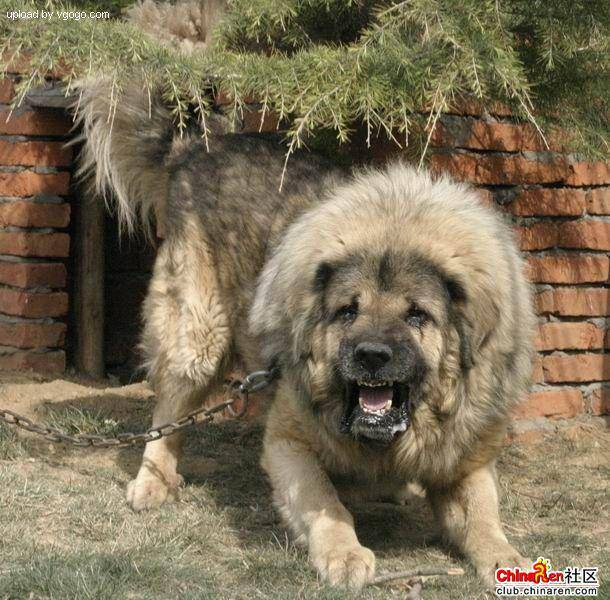

In [ ]:
# Additional check
Image(filenames[9000])

In [ ]:
labels_csv["breed"][9000]

'tibetan_mastiff'

Since we got our training image filepaths in a list, prepare the labels.

In [ ]:
import numpy as np
labels = labels_csv["breed"]
labels = np.array(labels)
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [ ]:
len(labels)

10222

In [ ]:
#Check if the number of labels matches the number of filenames
if len(labels) == len(filenames):
  print("Matches!")
else:
  print("Sorry, no match exists")

Matches!


In [ ]:
# Find the unique label values
unique_breeds = np.unique(labels)
unique_breeds
len(unique_breeds)

120

In [ ]:
# Turn a single label into an array of booleans
print(labels[0])
labels[0] == unique_breeds

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [ ]:
print(labels)

['boston_bull' 'dingo' 'pekinese' ... 'airedale' 'miniature_pinscher'
 'chesapeake_bay_retriever']


In [ ]:
# Turn every label into a boolean array
boolean_labels = [label == unique_breeds for label in labels]
boolean_labels[:]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [ ]:
len(boolean_labels)

10222

In [ ]:
# Turning the boolean array into integers
print(labels[0]) #original label
print(np.where(unique_breeds == labels[0])) #index where label occurs
print(boolean_labels[0].argmax()) #index where label occurs in boolean array
print(boolean_labels[0].astype(int)) # the integer value will be 1 where the sample lable occurs

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [ ]:
filenames[:]

['/content/drive/My Drive/Dog-vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 '/content/drive/My Drive/Dog-vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '/content/drive/My Drive/Dog-vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 '/content/drive/My Drive/Dog-vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '/content/drive/My Drive/Dog-vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 '/content/drive/My Drive/Dog-vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 '/content/drive/My Drive/Dog-vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 '/content/drive/My Drive/Dog-vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 '/content/drive/My Drive/Dog-vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 '/content/drive/My Drive/Dog-vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg',
 '/content/drive/My Drive/Dog-vision/train/004396df1acd0f1247b740ca2b14616e.jpg',
 '/content/drive/My Drive/Dog-vision/train/0067dc3eab0b3c3ef0439477624d85d6.jpg',
 '/content/drive

### Creating our own validation set
Since the dataset from Kaggle doesn't come with a validation set, let's create our own.

In [ ]:
#Setup x & y variables
x = filenames
y = boolean_labels

In [ ]:
len(filenames)

10222

We're going to start off experimenting with ~1000 images and increase as needed.

In [ ]:
# Set number of images for experimenting
NUM_IMAGES = 1000 #@param {type:"slider", min:1, max:1000, step:1}

In [ ]:
# Let's split our data into train and validation sets
from sklearn.model_selection import train_test_split

# Split them into training and validation of total size NUM_IMAGES
x_train, x_val, y_train, y_val = train_test_split(x[:NUM_IMAGES],
                                                  y[:NUM_IMAGES],
                                                  test_size = 0.2,
                                                  random_state = 42)
len(x_train), len(y_train), len(x_val), len(y_val)

(800, 800, 200, 200)

In [ ]:
# Let's have a look at our training data
x_train, y_train

(['/content/drive/My Drive/Dog-vision/train/00bee065dcec471f26394855c5c2f3de.jpg',
  '/content/drive/My Drive/Dog-vision/train/0d2f9e12a2611d911d91a339074c8154.jpg',
  '/content/drive/My Drive/Dog-vision/train/1108e48ce3e2d7d7fb527ae6e40ab486.jpg',
  '/content/drive/My Drive/Dog-vision/train/0dc3196b4213a2733d7f4bdcd41699d3.jpg',
  '/content/drive/My Drive/Dog-vision/train/146fbfac6b5b1f0de83a5d0c1b473377.jpg',
  '/content/drive/My Drive/Dog-vision/train/0ea5759640f2e1c2d1a06adaf8a54ca7.jpg',
  '/content/drive/My Drive/Dog-vision/train/03e1d2ee5fd90aef036c90a9e7f81177.jpg',
  '/content/drive/My Drive/Dog-vision/train/16941a6728ddb9cb7423a6cc97fbe071.jpg',
  '/content/drive/My Drive/Dog-vision/train/0bedbecd92390ef9f4f7c8b06a629340.jpg',
  '/content/drive/My Drive/Dog-vision/train/143b9484273e57668d03bfc26755810a.jpg',
  '/content/drive/My Drive/Dog-vision/train/019ff93e03802e661577b5869e099dcb.jpg',
  '/content/drive/My Drive/Dog-vision/train/035f28d8ad34afaf7c8d276d6674bf8f.jpg',
  '/

## Preprocessing Images(turning images into Tensors)
Algorithm to preprocess our images into Tensors:
1. Take an image filepath as input.
2. Use TensorFlow to read the file and save it to a variable, `image`
3. Turn the `image` (jpg) into Tensors.
4. Resize the image to a size of (224, 224).
5. Return the modified `image`

In [ ]:
# Convert image to NumPy array
from matplotlib.pyplot import imread
image = imread(filenames[42])
image.shape

(257, 350, 3)

In [ ]:
image.max(), image.min()

(255, 0)

In [ ]:
image[:2]

array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]]], dtype=uint8)

In [ ]:
# turn image into data
tf.constant(image)[:2]

<tf.Tensor: shape=(2, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]]], dtype=uint8)>

In [ ]:
# Define image size
IMG_SIZE = 224

# Create a function for preprocessing images
def process_image(image_path, img_size= IMG_SIZE):
  """
  Takes an iamge file and turn the image into a tensor.
  """
  #Read an image file
  image = tf. io.read_file(image_path)
  #Turn th jpeg image into numerical Tensor with 3 colour RGB channel
  image = tf.image.decode_jpeg(image, channels=3)
  #Convert the colour channels from 0-255 to 0-1
  image = tf.image.convert_image_dtype(image, tf.float32)
  #Resize the image to our desired values(224, 224)
  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])

  return image

## Turning into batches
Split the dataset into minibatches of size 32.

The minibatches help in proper utilization of the memory space, which can be resized as needed.

We need our data in the form of Tensor tuples `(image, label)` for TensorFlow to run effectively.

In [ ]:
# Create a simple function to return a tuple (image, label)
def get_image_label(image_path, label):
  """
  Takes an image file pathname and assosciated label, processes the image and returns a tuple
  """
  image = process_image(image_path)
  return image, label

In [ ]:
# Demo of the above
(process_image(x[42]), tf.constant(y[42]))

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.3264178 , 0.5222886 , 0.3232816 ],
         [0.2537167 , 0.44366494, 0.24117757],
         [0.25699762, 0.4467087 , 0.23893751],
         ...,
         [0.29325107, 0.5189916 , 0.3215547 ],
         [0.29721776, 0.52466875, 0.33030328],
         [0.2948505 , 0.5223015 , 0.33406618]],
 
        [[0.25903144, 0.4537807 , 0.27294815],
         [0.24375686, 0.4407019 , 0.2554778 ],
         [0.2838985 , 0.47213382, 0.28298813],
         ...,
         [0.2785345 , 0.5027992 , 0.31004712],
         [0.28428748, 0.5108719 , 0.32523635],
         [0.28821915, 0.5148036 , 0.32916805]],
 
        [[0.20941195, 0.40692952, 0.25792548],
         [0.24045378, 0.43900946, 0.2868911 ],
         [0.29001117, 0.47937486, 0.32247734],
         ...,
         [0.26074055, 0.48414773, 0.30125174],
         [0.27101526, 0.49454468, 0.32096273],
         [0.27939945, 0.5029289 , 0.32934693]],
 
        ...,
 
        [[0.00634795, 0.03442048

Now our data is in the form of tuples of Tensors : `(image, label)`, let's make a function to turn all of our data (`x` & `y`) into batches!

In [ ]:
# Define the batch size, 32 is a good start
BATCH_SIZE = 32

# Create a function to turn data into batches
def create_data_batches(X, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  """
  Creates batches of data in the form of image (X) and label (y) pairs.
  Shuffles the data if it's training data but doesn't shuffle if it's validation data.
  Also accepts test data as input (no labels).
  """
  # If the data is a test dataset, we probably don't have have labels
  if test_data:
    print("Creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X))) # only filepaths (no labels)
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch

  # If the data is a valid dataset, we don't need to shuffle it
  elif valid_data:
    print("Creating validation data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), # filepaths
                                               tf.constant(y))) # labels
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  else:
    print("Creating training data batches...")
    # Turn filepaths and labels into Tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                               tf.constant(y)))
    # Shuffling pathnames and labels before mapping image processor function is faster than shuffling images
    data = data.shuffle(buffer_size=len(X))

    # Create (image, label) tuples (this also turns the iamge path into a preprocessed image)
    data = data.map(get_image_label)

    # Turn the training data into batches
    data_batch = data.batch(BATCH_SIZE)
  return data_batch

In [ ]:
 # Create training and validation data batches
train_data = create_data_batches(x_train, y_train)
val_data = create_data_batches(x_val, y_val, valid_data= True)

Creating training data batches...
Creating validation data batches...


In [ ]:
# Check out the different attributes of our data batches
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

In [ ]:
# Check out the different attributes of our data batches
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

In [ ]:
y[0]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

## Visualizing Data Batches

Our data is now in batches, however, this can be a little hard to understand/comprehend, let's visualize them!

In [ ]:
import matplotlib.pyplot as plt

#Create a function for viewing images in a data batches
def show_25_images(images, labels):
  """
  Display a plot of 25 images and their labels from a data batch.
  """
  # Setup the figure
  plt.figure(figsize=(10, 10))
  # Loopthrougn 25 (for displaying 25 images)
  for i in range(25):
    # Create subplots (5 rows, 5 Columns)
    ax = plt.subplot(5, 5, i+1)
    # Display an image
    plt.imshow(images[i])
    # Add the image label as the title
    plt.title(unique_breeds[labels[i].argmax()])
    # Turn the grid lines off
    plt.axis("off")

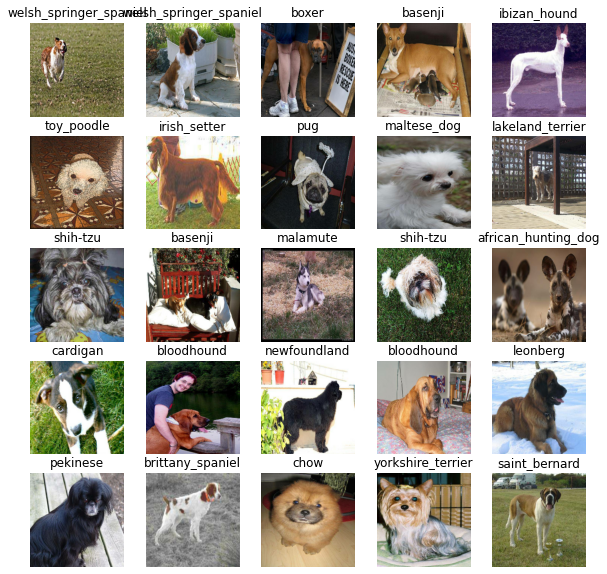

In [ ]:
# Let's visualize the data in a training batch
train_images, train_labels = next(train_data.as_numpy_iterator())
show_25_images(train_images, train_labels)

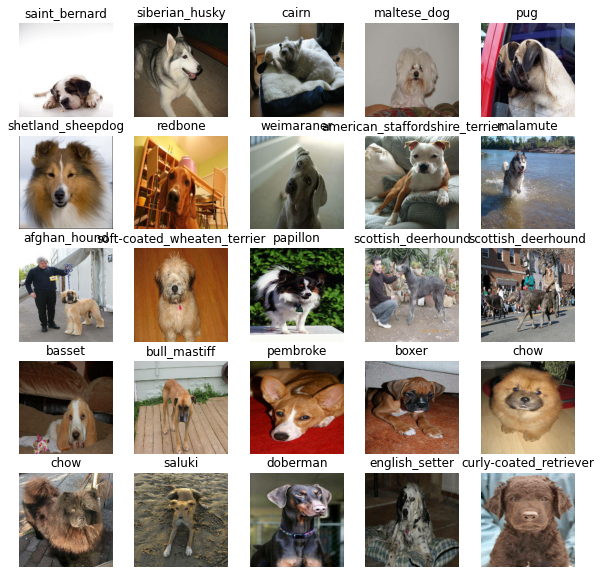

In [ ]:
# Let's visualize our validation set
val_images, val_labels = next(train_data.as_numpy_iterator())
show_25_images(val_images, val_labels)


## Building a model

Before we build a model, there a few things we need to define:
* The input shape (our images shape, in the form of Tensors) to our model.
* The output shape (image labels, in the form of Tensors) of our model.
* The URL of the model we want to use.

In [ ]:
IMG_SIZE

224

In [ ]:
# Setup image shape to the model
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] # batch, height, width, colour channels

# Setup output shape of our model
OUTPUT_SHAPE = len(unique_breeds)

#Setup model URL from TensorFlow Hub
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"

Now we've got our inputs, outputs and model ready. Let's put them together into a keras deep learning model!

Let's create a function that:
* Takes the input shape, output shape and the model we've chosen as parameters.
* Defines the layer in a keras model in sequential manner(step by step).
* Builds the model(tells the model the input shape it'll be getting).
* Returns the model.
- https://www.tensorflow.org/api_docs/python/tf/keras/applications/MobileNetV2

In [ ]:
# Create a function which builds a Keras model
def create_model(input_shaape = INPUT_SHAPE, output_shape = OUTPUT_SHAPE, model_url = MODEL_URL):
  print("Building with:", MODEL_URL)

  #Setup the model layers
  model = tf.keras.Sequential([
    hub.KerasLayer(MODEL_URL), #Layer 1 (i/p layer)
    tf.keras.layers.Dense(units = OUTPUT_SHAPE,
                         activation = "softmax") #LAyer 2 (o/p layer)
  ])

  # Compile the model
  model.compile(
      loss = tf.keras.losses.CategoricalCrossentropy(),
      optimizer = tf.keras.optimizers.Adam(),
      metrics = ["accuracy"]
  )

  #Build the model
  model.build(INPUT_SHAPE)

  return model

In [ ]:
model = create_model()
model.summary()

Building with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1001)              5432713   
_________________________________________________________________
dense (Dense)                (None, 120)               120240    
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


## Callbacks

Callbacks are helper functions a model can use during training to do such things, as saving progress or stop training early if a model stops imporving.

We'll create two callbacks, one for TensorBoard which helps track our models progess and another for early stopping which prevents our model from training for too long.

## TensorBoard callbacks

To setup a TensorBoard callback:
1. Load TensorBoard extension.
2. Create a TensorBoard callback which is able to save ogs to a directory and pass it to our model's `fit()` function.
3. Visualize our models training logs with the `%tensorboard` magic function(done after model training).

In [ ]:
# Load TensorBoard notebook extension
%load_ext tensorboard

In [ ]:
import datetime

# Create a function to build a TensorBoard callback
def create_tensorboard_callback():
  # Create a log directory for storing TensorBoard logs
  logdir = os.path.join("/content/drive/My Drive/Dog-vision/logs",
                        #Make it so the logs gets tracked whenever we run an experiment
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(logdir)

### Early stopping callback
Stops our model from overfitting by stopping training if a certain evaluation metric stops improving.

https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping

In [ ]:
# Create early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                  patience=3)

## Training a model (on subset of data)

Our first model is only going to train on 1000 images, to make sure everything is working.

In [ ]:
NUM_EPOCHS = 100 #@param  {type:"slider", min:10, max:100, step:10}

In [ ]:
# Checking if GPU is running fine:
print("GPU:", "True!" if tf.config.list_physical_devices("GPU")else "False!")

GPU: True!


Function which trains a model.

* Create a model using `create_model()`
* Setup a TensorBoard callabck using `create_tensorboard_callback()`
* Call the `fit()` function on our model passing it the training data, validation data, number of epochs to train for (`NUM_EPOCHS`) and the callbacks we'd like to use.
* Return the model.

In [ ]:
# Building a function to train and return a trained model
def train_model():
  """
  Trains a given model and returns the trained version.
  """
  # Create a model
  model = create_model()

  # Create new TensorBoard session everytime we train a model
  tensorboard = create_tensorboard_callback()

  # Fit the model to the data passing it the callabcks we created
  model.fit(x = train_data,
           epochs = NUM_EPOCHS,
           validation_data = val_data,
           validation_freq = 1,
           callbacks = [tensorboard, early_stopping])
  # Return the fitted model
  return model

In [ ]:
# Fit the model to the data
model = train_model()

Building with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Epoch 1/100
 1/25 [>.............................] - ETA: 0s - loss: 5.8524 - accuracy: 0.0312WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.


Instructions for updating:
use `tf.profiler.experimental.stop` instead.


25/25 [==============================] - 526s 21s/step - loss: 4.6568 - accuracy: 0.0913 - val_loss: 3.5207 - val_accuracy: 0.2250
Epoch 2/100
25/25 [==============================] - 4s 160ms/step - loss: 1.6760 - accuracy: 0.6900 - val_loss: 2.2592 - val_accuracy: 0.5000
Epoch 3/100
25/25 [==============================] - 4s 155ms/step - loss: 0.5786 - accuracy: 0.9350 - val_loss: 1.7414 - val_accuracy: 0.5650
Epoch 4/100
25/25 [==============================] - 4s 157ms/step - loss: 0.2623 - accuracy: 0.9800 - val_loss: 1.5198 - val_accuracy: 0.6000
Epoch 5/100
25/25 [==============================] - 4s 157ms/step - loss: 0.1491 - accuracy: 0.9987 - val_loss: 1.4477 - val_accuracy: 0.6300
Epoch 6/100
25/25 [==============================] - 4s 156ms/step - loss: 0.1023 - accuracy: 1.0000 - val_loss: 1.4100 - val_accuracy: 0.6100
Epoch 7/100
25/25 [==============================] - 4s 159ms/step - loss: 0.0764 - accuracy: 1.0000 - val_loss: 1.3756 - val_accuracy: 0.6250
Epoch 8/100

### Checking the TensorBoard logs

The TensorBoard magic function (`%tensorboard`) will access the logs directory we created earlier and visualize its content.

In [ ]:
%tensorboard --logdir drive/My\ Drive/Dog-vision/logs

## Making and evaluating predictions using a trained model

In [ ]:
# Make redictions on the validation data (not used to train on)
predictions = model.predict(val_data, verbose=1)
predictions

7/7 [==============================] - 1s 103ms/step


array([[6.80574973e-04, 1.61996562e-04, 1.54425483e-03, ...,
        2.58855202e-04, 2.24542928e-05, 2.97401892e-03],
       [5.65218681e-04, 6.78489523e-05, 1.59823801e-02, ...,
        1.25380175e-03, 2.06184108e-03, 2.94391066e-04],
       [3.15121542e-05, 3.01032938e-04, 9.49133901e-05, ...,
        1.02478065e-04, 2.61828711e-04, 8.86930968e-04],
       ...,
       [6.47347633e-06, 3.38246376e-04, 6.12419390e-05, ...,
        1.24972803e-05, 2.23279349e-04, 8.42439767e-04],
       [2.83936039e-03, 1.17671654e-04, 1.96774097e-04, ...,
        3.11428885e-04, 1.92677049e-04, 7.59912003e-03],
       [2.34474850e-04, 4.82835931e-05, 2.19178782e-03, ...,
        6.05297880e-03, 5.21443668e-04, 1.64991754e-04]], dtype=float32)

In [ ]:
predictions.shape

(200, 120)

In [ ]:
len(y_val)

200

In [ ]:
len(unique_breeds)

120

In [ ]:
# First prediction
index = 0
print(predictions[index])
print(f"Max value (probability of prediction): {np.max(predictions[index])}")
print(f"Sum: {np.sum(predictions[index])}")
print(f"Max index: {np.argmax(predictions[index])}")
print(f"Predicted label: {unique_breeds[np.argmax(predictions[index])]}")


[6.80574973e-04 1.61996562e-04 1.54425483e-03 1.40339616e-04
 2.32410152e-04 3.90785681e-05 2.49596406e-02 6.09245675e-04
 1.40197284e-04 6.34822529e-04 1.04917373e-04 1.32256086e-04
 2.55761144e-04 7.57679954e-05 4.71156236e-04 9.82607133e-04
 1.31434514e-04 2.01923594e-01 5.84531517e-06 3.06661022e-05
 4.01297293e-04 5.17786430e-05 1.23801816e-04 5.29055367e-04
 6.60055302e-05 1.64481433e-04 2.83794224e-01 4.95057757e-05
 1.52316279e-04 1.36749790e-04 7.09149608e-05 1.66284817e-03
 6.01894921e-04 6.75252886e-06 2.27493310e-05 1.88150611e-02
 4.45612968e-05 1.45769183e-04 1.91922503e-04 8.84650944e-05
 1.52331032e-03 1.68335191e-05 9.78945245e-05 1.23088743e-04
 1.53997662e-05 1.35434166e-04 8.42867958e-05 4.66031808e-04
 7.14658818e-04 9.75540315e-05 1.03072183e-04 1.62079014e-05
 2.82093039e-04 1.35465947e-04 8.59278152e-05 2.97563005e-04
 6.81816746e-05 3.03261238e-03 1.95748988e-04 2.47795265e-02
 3.22912092e-04 1.39507887e-04 1.00527168e-03 1.29574819e-05
 8.73426034e-05 2.016841

Having this information is great but it would be even better if we could compare a prediction to its true label and original image.

To help us, let's first build a little function to convert prediction probabilities into predicted labels.

Note: Prediction probabilities are also known as confidence levels.

In [ ]:
# Turn prediction probabilities into their respective label (easier to understand)
def get_pred_label(prediction_probabilities):
  """
  Turns an array of prediction probabilities into a label.
  """
  return unique_breeds[np.argmax(prediction_probabilities)]

# Get a predicted label based on an array of prediction probabilities
pred_label = get_pred_label(predictions[0])
pred_label

'cairn'

Wonderful! Now we've got a list of all different predictions our model has made, we'll do the same for the validation images and validation labels.

Remember, the model hasn't trained on the validation data, during the fit() function, it only used the validation data to evaluate itself. So we can use the validation images to visually compare our models predictions with the validation labels.

Since our validation data (val_data) is in batch form, to get a list of validation images and labels, we'll have to unbatch it (using unbatch()) and then turn it into an iterator using as_numpy_iterator().

Let's make a small function to do so.

In [ ]:
# Create a function to unbatch a batched dataset
def unbatchify(data):
  """
  Takes a batched dataset of (image, label) Tensors and returns separate arrays
  of images and labels.
  """
  images = []
  labels = []
  # Loop through unbatched data
  for image, label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_breeds[np.argmax(label)])
  return images, labels

# Unbatchify the validation data
val_images, val_labels = unbatchify(val_data)
val_images[0], val_labels[0]

(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.2770141 , 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278

Now we've got ways to get:

Prediction labels
Validation labels (truth labels)
Validation images
Let's make some functions to make these all a bit more visualize.

More specifically, we want to be able to view an image, its predicted label and its actual label (true label).

The first function we'll create will:

Take an array of prediction probabilities, an array of truth labels, an array of images and an integer.
Convert the prediction probabilities to a predicted label.
Plot the predicted label, its predicted probability, the truth label and target image on a single plot.

In [ ]:
def plot_pred(prediction_probabilities, labels, images, n=1):
  """
  View the prediction, ground truth label and image for sample n.
  """
  pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]

  # Get the pred label
  pred_label = get_pred_label(pred_prob)

  # Plot image & remove ticks
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  # Change the color of the title depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  plt.title("{} {:2.0f}% ({})".format(pred_label,
                                      np.max(pred_prob)*100,
                                      true_label),
                                      color=color)

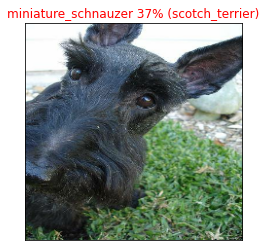

In [ ]:
# View an example prediction, original image and truth label
plot_pred(prediction_probabilities=predictions,
          labels=val_labels,
          images=val_images)

Let's build a function to demonstrate. The function will:

* Take an input of a prediction probabilities array, a ground truth labels array and an integer.
* Find the predicted label using get_pred_label().
* Find the top 10:
 * Prediction probabilities indexes
 * Prediction probabilities values
 * Prediction labels
*Plot the top 10 prediction probability values and labels, coloring the true label green.


In [ ]:
def plot_pred_conf(prediction_probabilities, labels, n=1):
  """
  Plots the top 10 highest prediction confidences along with
  the truth label for sample n.
  """
  pred_prob, true_label = prediction_probabilities[n], labels[n]

  # Get the predicted label
  pred_label = get_pred_label(pred_prob)

  # Find the top 10 prediction confidence indexes
  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]
  # Find the top 10 prediction confidence values
  top_10_pred_values = pred_prob[top_10_pred_indexes]
  # Find the top 10 prediction labels
  top_10_pred_labels = unique_breeds[top_10_pred_indexes]

  # Setup plot
  top_plot = plt.bar(np.arange(len(top_10_pred_labels)),
                     top_10_pred_values,
                     color="grey")
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels=top_10_pred_labels,
             rotation="vertical")

  # Change color of true label
  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
  else:
    pass

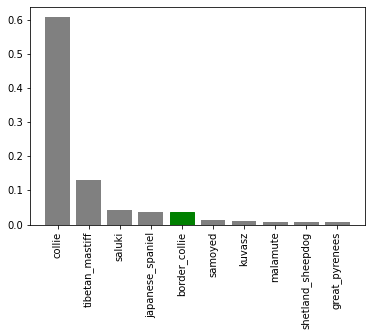

In [ ]:
plot_pred_conf(prediction_probabilities=predictions,
               labels=val_labels,
               n=9)

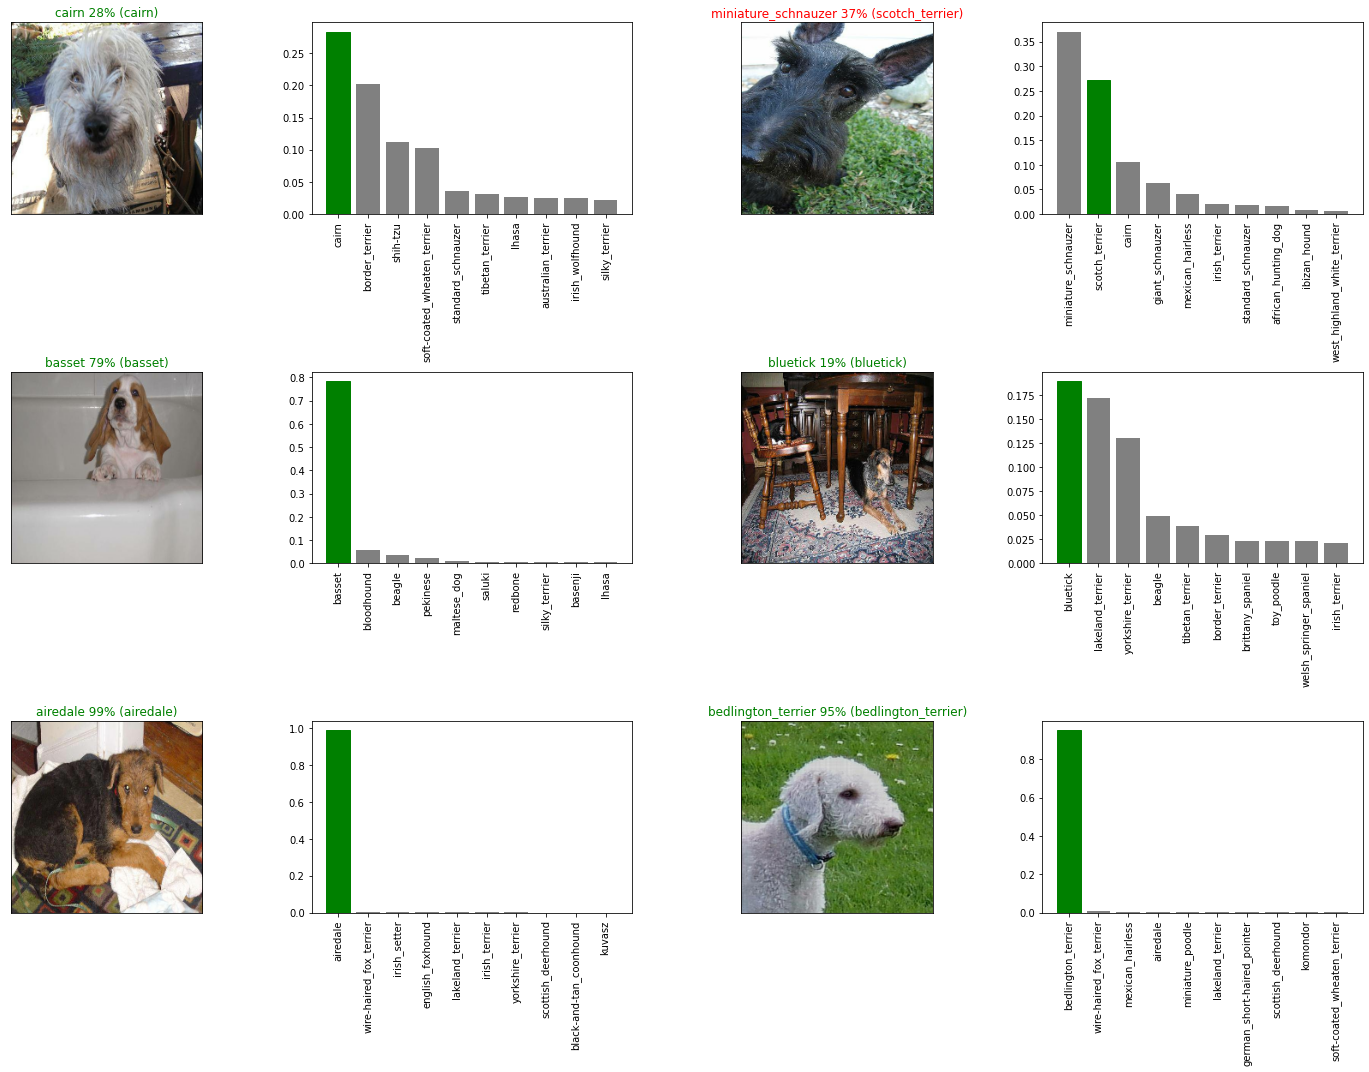

In [ ]:
# Let's check a few predictions and their different values
i_multiplier = 0
num_rows = 3
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(5*2*num_cols, 5*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_pred(prediction_probabilities=predictions,
            labels=val_labels,
            images=val_images,
            n=i+i_multiplier)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_pred_conf(prediction_probabilities=predictions,
                labels=val_labels,
                n=i+i_multiplier)
plt.tight_layout(h_pad=1.0)
plt.show()

## Saving and reloading a model
After training a model, it's a good idea to save it. Saving it means you can share it with colleagues, put it in an application and more importantly, won't have to go through the potentially expensive step of retraining it.

The format of an entire saved Keras model is h5. So we'll make a function which can take a model as input and utilise the save() method to save it as a h5 file to a specified directory.



In [ ]:
def save_model(model, suffix=None):
  """
  Saves a given model in a models directory and appends a suffix (str)
  for clarity and reuse.
  """
  # Create model directory with current time
  modeldir = os.path.join("drive/My Drive/Data/models",
                          datetime.datetime.now().strftime("%Y%m%d-%H%M%s"))
  model_path = modeldir + "-" + suffix + ".h5" # save format of model
  print(f"Saving model to: {model_path}...")
  model.save(model_path)
  return model_path

In [ ]:
def load_model(model_path):
  """
  Loads a saved model from a specified path.
  """
  print(f"Loading saved model from: {model_path}")
  model = tf.keras.models.load_model(model_path,
                                     custom_objects={"KerasLayer":hub.KerasLayer})
  return model

In [ ]:
# Save our model trained on 1000 images
save_model(model, suffix="1000-images-Adam")

Saving model to: drive/My Drive/Data/models/20201019-06311603089063-1000-images-Adam.h5...


'drive/My Drive/Data/models/20201019-06311603089063-1000-images-Adam.h5'

In [ ]:
# Load our model trained on 1000 images
model_1000_images = load_model('/content/drive/My Drive/Data/models/20201012-15531602518032-1000-images-Adam.h5')

Loading saved model from: /content/drive/My Drive/Data/models/20201012-15531602518032-1000-images-Adam.h5


Compare the two models

In [ ]:
# Evaluate the pre-saved model
model.evaluate(val_data)

7/7 [==============================] - 1s 95ms/step - loss: 1.3474 - accuracy: 0.6250


[1.347428560256958, 0.625]

In [ ]:
# Evaluate the loaded model
model_1000_images.evaluate(val_data)

7/7 [==============================] - 1s 104ms/step - loss: 1.2956 - accuracy: 0.6800


[1.2956222295761108, 0.6800000071525574]

## Training a model (on the full data)

In [ ]:
# Remind ourselves of the size of the full dataset
len(x), len(y)

(10222, 10222)

In [ ]:
# Turn full training data in a data batch
full_data = create_data_batches(x, y)

Creating training data batches...


In [ ]:
# Instantiate a new model for training on the full dataset
full_model = create_model()

Building with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4


In [ ]:
# Create full model callbacks

# TensorBoard callback
full_model_tensorboard = create_tensorboard_callback()

# Early stopping callback
# Note: No validation set when training on all the data, therefore can't monitor validation accruacy
full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor="accuracy",
                                                             patience=3)

In [ ]:
%tensorboard --logdir drive/My\ Drive/Dog-vision/logs

Reusing TensorBoard on port 6006 (pid 1462), started 0:00:23 ago. (Use '!kill 1462' to kill it.)

<IPython.core.display.Javascript object>

In [ ]:
# Fit the full model to the full training data
full_model.fit(x=full_data,
               epochs=NUM_EPOCHS,
               callbacks=[full_model_tensorboard,
                          full_model_early_stopping])

Epoch 1/100


## Saving and reloading the full model

In [ ]:
# Save model to file
save_model(full_model, suffix="all-images-Adam")

In [ ]:
# Load in the full model
loaded_full_model = load_model('/content/drive/My Drive/Data/models/20201012-15531602518032-1000-images-Adam.h5')

##Making predictions on the test dataset

In [ ]:
# Load test image filenames (since we're using os.listdir(), these already have .jpg)
test_path = "drive/My Drive/Data/test/"
test_filenames = [test_path + fname for fname in os.listdir(test_path)]

test_filenames[:10]

In [ ]:
# How many test images are there?
len(test_filenames)

In [ ]:
# Create test data batch
test_data = create_data_batches(test_filenames, test_data=True)

In [ ]:
# Make predictions on test data batch using the loaded full model
test_predictions = loaded_full_model.predict(test_data,
                                             verbose=1)

In [ ]:
# Check out the test predictions
test_predictions[:10]

##Preparing test dataset predictions for Kaggle
Looking at the Kaggle sample submission, it looks like they want the models output probabilities each for label along with the image ID's.

To get the data in this format, we'll:

* Create a pandas DataFrame with an ID column as well as a column for each dog breed.
* Add data to the ID column by extracting the test image ID's from their filepaths.
* Add data (the prediction probabilities) to each of the dog breed columns using the unique_breeds list and the test_predictions list.
* Export the DataFrame as a CSV to submit it to Kaggle.

In [ ]:
# Create pandas DataFrame with empty columns
preds_df = pd.DataFrame(columns=["id"] + list(unique_breeds))
preds_df.head()

In [ ]:
# Append test image ID's to predictions DataFrame
test_path = "drive/My Drive/Data/test/"
preds_df["id"] = [os.path.splitext(path)[0] for path in os.listdir(test_path)]
preds_df.head()

In [ ]:
# Add the prediction probabilities to each dog breed column
preds_df[list(unique_breeds)] = test_predictions
preds_df.head()

In [ ]:
preds_df.to_csv("drive/My Drive/Data/full_submission_1_mobilienetV2_adam.csv",
                 index=False)

##Making predictions on custom images
It's great being able to make predictions on a test dataset already provided for us.

But how could we use our model on our own images?

The premise remains, if we want to make predictions on our own custom images, we have to pass them to the model in the same format the model was trained on.

To make predictions on custom images using your trained model, follow these steps:

* Collect Filepaths: Gather the filepaths of your custom images.
* Create Data Batches: Utilize the create_data_batches() function to convert the filepaths into data batches. Since your custom images won't have labels, set the test_data parameter to True.
* Predictions: Pass the custom image data batch to your model's predict() method to obtain prediction probabilities.
* Convert Probabilities to Labels: Convert the prediction output probabilities to prediction labels.
* Comparison: Compare the predicted labels to the custom images.

For example, if you've uploaded your custom images to a directory located at "drive/My Drive/Data/dogs/", you can adapt these steps accordingly.

Keep in mind that the success of predictions on custom images relies on the similarity of your custom data to the training data. If your custom images significantly differ from the training data, the model might not perform well.

In [ ]:
# Get custom image filepaths
custom_path = "drive/My Drive/Data/dogs/"
custom_image_paths = [custom_path + fname for fname in os.listdir(custom_path)]

In [ ]:
# Turn custom image into batch (set to test data because there are no labels)
custom_data = create_data_batches(custom_image_paths, test_data=True)

In [ ]:
# Make predictions on the custom data
custom_preds = loaded_full_model.predict(custom_data)

In [ ]:
# Get custom image prediction labels
custom_pred_labels = [get_pred_label(custom_preds[i]) for i in range(len(custom_preds))]
custom_pred_labels

In [ ]:
# Get custom images (our unbatchify() function won't work since there aren't labels)
custom_images = []
# Loop through unbatched data
for image in custom_data.unbatch().as_numpy_iterator():
  custom_images.append(image)